In [33]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [34]:
param_grid = {
    'optimizer_lr': [0.001, 0.0001],
    'activation': ['relu', LeakyReLU()],
    'dropout_rate': [0.1, 0.3, 0.5],
    'batch_size': [60, 120],
    'epochs': [15, 25]
}

## Load Dataset (Fashion-MNIST)

In [35]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("Training data shape:", train_images.shape)   # (60000, 28, 28)
print("Testing data shape:", test_images.shape)     # (10000, 28, 28)


Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


## Visualize Raw Images

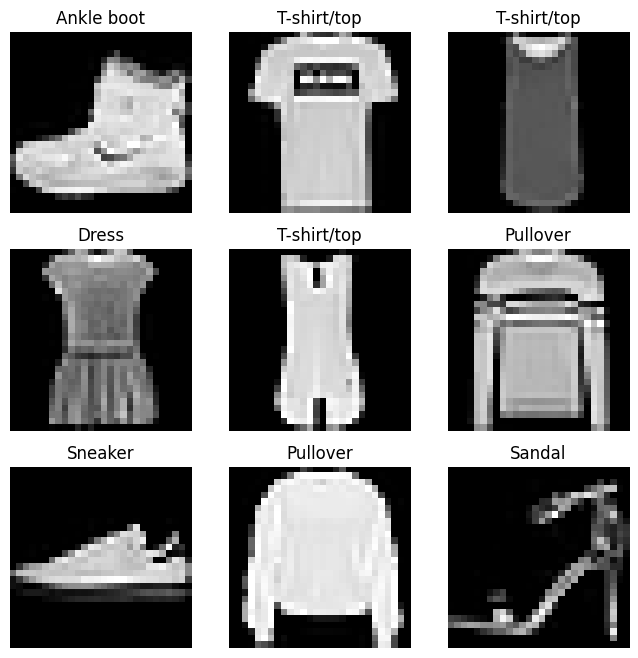

In [36]:

plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images[i], cmap='gray')        # grayscale
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.show()


##  Normalize Pixel Values (0–1)

In [37]:

train_images = train_images.astype("float32") / 255.0
test_images  = test_images.astype("float32") / 255.0

## Flatten Images for ANN Input (28×28 → 784)

In [38]:
train_images = train_images.reshape((train_images.shape[0], -1))  # 28×28 → 784
test_images  = test_images.reshape((test_images.shape[0], -1))

print("New training image shape:", train_images.shape)  # (60000, 784)

New training image shape: (60000, 784)


## Applying One-Hot Encoding

In [39]:

train_labels1 = to_categorical(train_labels, 10)
test_labels1  = to_categorical(test_labels, 10)

print("Example encoded label:", train_labels1[0])

Example encoded label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Define the ANN Model

In [40]:
def build_model(optimizer_lr=0.001, activation='relu', dropout_rate=0.1):
    """
    activation: either string 'relu' OR a LeakyReLU() instance
    dropout_rate: single scalar applied to both dropout layers
    """
    model = models.Sequential([
        layers.Dense(1024, input_shape=(784,)),
        layers.Activation(activation) if isinstance(activation, str) else activation,
        layers.Dropout(dropout_rate),

        layers.Dense(512),
        layers.Activation(activation) if isinstance(activation, str) else activation,

        layers.Dense(256),
        layers.Activation(activation) if isinstance(activation, str) else activation,
        layers.Dropout(dropout_rate),

        layers.Dense(128),
        layers.Activation(activation) if isinstance(activation, str) else activation,

        layers.Dense(64),
        layers.Activation(activation) if isinstance(activation, str) else activation,

        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=optimizer_lr, weight_decay=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


## Hyper-parameter grid


In [41]:

# model.compile(optimizer=Adam(learning_rate=0.0001, weight_decay=1e-4),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

param_grid = {
    'optimizer_lr': [0.001, 0.0001],
    'activation':   ['relu', LeakyReLU()],
    'dropout_rate': [0.1, 0.3, 0.5],
    'batch_size':   [60, 120],
    'epochs':       [15, 25]
}

In [42]:
# Grid-search loop
best_accuracy = 0
best_params = {}
best_result   = {}

keys   = param_grid.keys()
values = param_grid.values()

for combination in itertools.product(*values):
    params = dict(zip(keys, combination))

    print("Training with parameters:", params)

    model = build_model(optimizer_lr=params['optimizer_lr'],
                        activation=params['activation'],
                        dropout_rate=params['dropout_rate'])

    history = model.fit(train_images, train_labels1,
                        epochs=params['epochs'],
                        batch_size=params['batch_size'],
                        validation_data=(test_images, test_labels1),
                        verbose=0)

    val_accuracy = history.history['val_accuracy'][-1]
    print("Validation accuracy:", val_accuracy)

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_params   = params
        best_result   = {**params, 'val_accuracy': val_accuracy}

print("\nBest parameters found:")
print(best_params)
print("\nBest validation accuracy:")
print(best_accuracy)


Training with parameters: {'optimizer_lr': 0.001, 'activation': 'relu', 'dropout_rate': 0.1, 'batch_size': 60, 'epochs': 15}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation accuracy: 0.8851000070571899
Training with parameters: {'optimizer_lr': 0.001, 'activation': 'relu', 'dropout_rate': 0.1, 'batch_size': 60, 'epochs': 25}
Validation accuracy: 0.8953999876976013
Training with parameters: {'optimizer_lr': 0.001, 'activation': 'relu', 'dropout_rate': 0.1, 'batch_size': 120, 'epochs': 15}
Validation accuracy: 0.8906999826431274
Training with parameters: {'optimizer_lr': 0.001, 'activation': 'relu', 'dropout_rate': 0.1, 'batch_size': 120, 'epochs': 25}
Validation accuracy: 0.8952999711036682
Training with parameters: {'optimizer_lr': 0.001, 'activation': 'relu', 'dropout_rate': 0.3, 'batch_size': 60, 'epochs': 15}
Validation accuracy: 0.8880000114440918
Training with parameters: {'optimizer_lr': 0.001, 'activation': 'relu', 'dropout_rate': 0.3, 'batch_size': 60, 'epochs': 25}
Validation accuracy: 0.8931000232696533
Training with parameters: {'optimizer_lr': 0.001, 'activation': 'relu', 'dropout_rate': 0.3, 'batch_size': 120, 'epochs': 15}
Validat

In [43]:
best_model = build_model(**{k: v for k, v in best_params.items() if k != 'epochs' and k != 'batch_size'})
best_model.fit(train_images, train_labels1,
               epochs=best_params['epochs'],
               batch_size=best_params['batch_size'],
               validation_data=(test_images, test_labels1),
               verbose=2)

Epoch 1/25
500/500 - 7s - 13ms/step - accuracy: 0.7270 - loss: 0.7785 - val_accuracy: 0.8309 - val_loss: 0.4737
Epoch 2/25
500/500 - 2s - 3ms/step - accuracy: 0.8363 - loss: 0.4609 - val_accuracy: 0.8481 - val_loss: 0.4179
Epoch 3/25
500/500 - 2s - 3ms/step - accuracy: 0.8559 - loss: 0.4017 - val_accuracy: 0.8587 - val_loss: 0.3893
Epoch 4/25
500/500 - 2s - 3ms/step - accuracy: 0.8682 - loss: 0.3689 - val_accuracy: 0.8672 - val_loss: 0.3727
Epoch 5/25
500/500 - 2s - 3ms/step - accuracy: 0.8741 - loss: 0.3443 - val_accuracy: 0.8723 - val_loss: 0.3533
Epoch 6/25
500/500 - 2s - 3ms/step - accuracy: 0.8810 - loss: 0.3268 - val_accuracy: 0.8775 - val_loss: 0.3428
Epoch 7/25
500/500 - 2s - 4ms/step - accuracy: 0.8862 - loss: 0.3111 - val_accuracy: 0.8775 - val_loss: 0.3416
Epoch 8/25
500/500 - 2s - 4ms/step - accuracy: 0.8893 - loss: 0.2997 - val_accuracy: 0.8805 - val_loss: 0.3298
Epoch 9/25
500/500 - 2s - 3ms/step - accuracy: 0.8928 - loss: 0.2887 - val_accuracy: 0.8773 - val_loss: 0.3347


## Evaluate the Model

In [44]:
test_loss, test_acc = best_model.evaluate(test_images, test_labels1, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.8962 - loss: 0.3209
Test accuracy: 0.8962000012397766


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


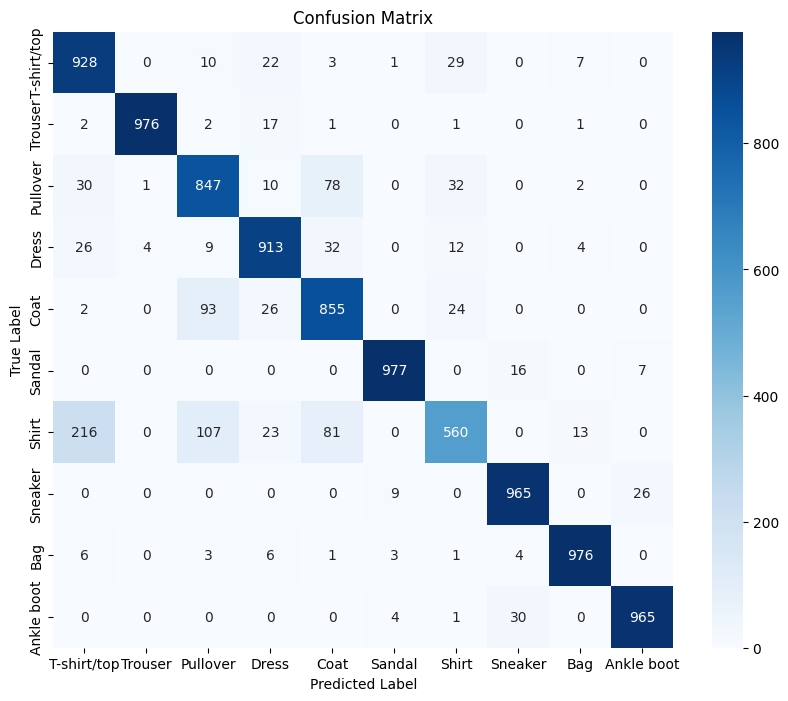

In [45]:
predictions = best_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Classification Report


In [47]:


# Generate the classification report
report = classification_report(test_labels, predicted_labels, target_names=class_names)

# Print the report
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.77      0.93      0.84      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.79      0.85      0.82      1000
       Dress       0.90      0.91      0.91      1000
        Coat       0.81      0.85      0.83      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.85      0.56      0.67      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.89     10000



## Visualize Training Accuracy


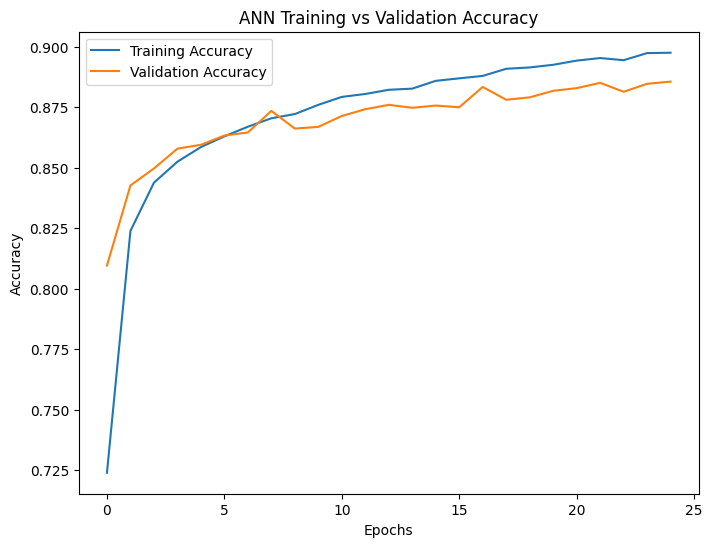

In [48]:
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## 🧩 Visualize Misclassified Images

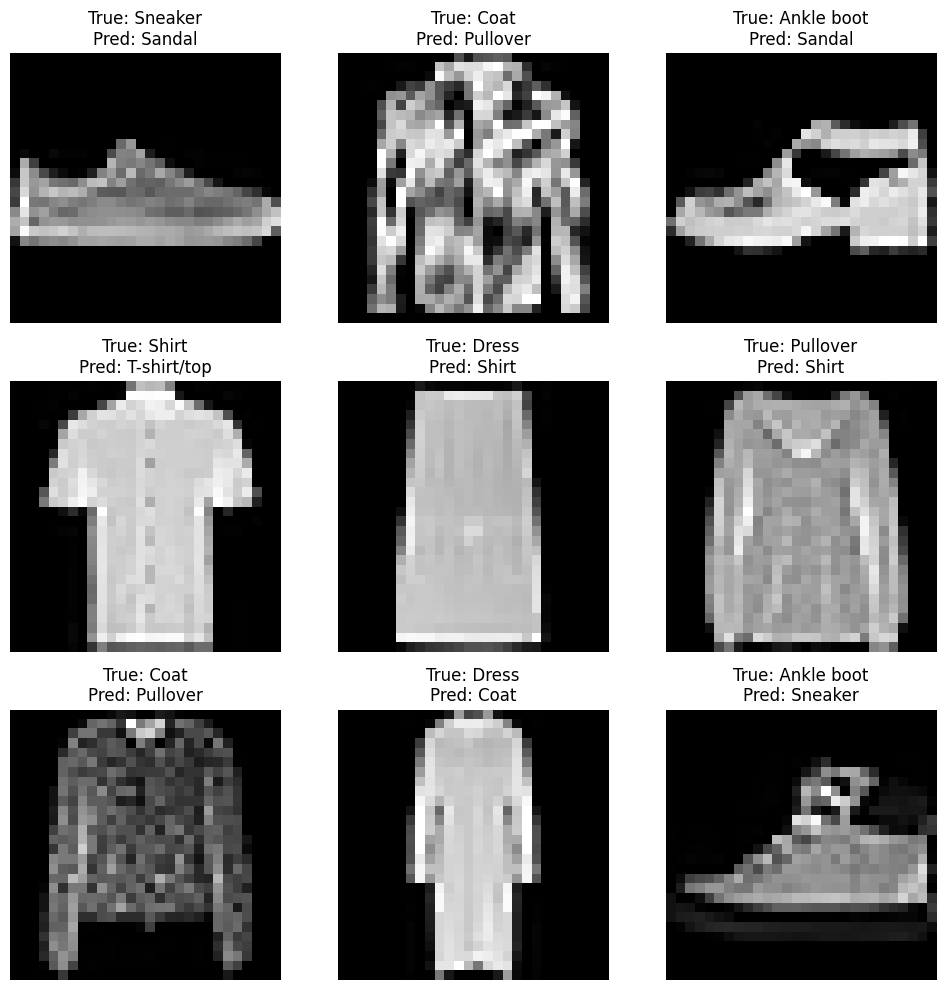

In [49]:
# Find misclassified images
misclassified_indices = np.where(predicted_labels != test_labels)[0]

# Display a few misclassified images
plt.figure(figsize=(10, 10))
for i, index in enumerate(misclassified_indices[:9]): # Display up to 9 misclassified images
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[test_labels[index]]}\nPred: {class_names[predicted_labels[index]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## 🧩 Predict and Visualize Results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


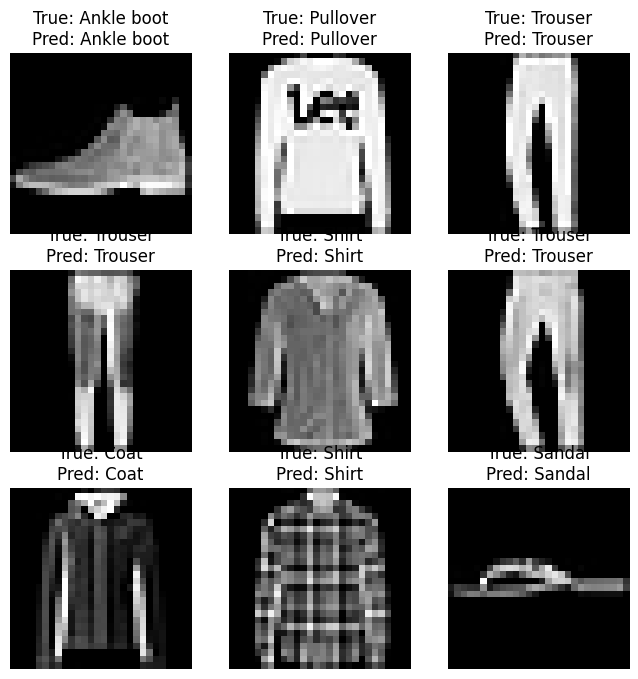

In [50]:

predictions = model.predict(test_images)
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(test_images[i].reshape(28,28), cmap='gray')  # 28×28 grayscale
    plt.title(f"True: {class_names[test_labels[i]]}\nPred: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
plt.show()
